In [3]:
import torch
torch.cuda.empty_cache() 

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [5]:
import pandas as pd
import pyproj

In [6]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [7]:
from pathlib import Path

In [8]:
import joblib

In [9]:
from mt_function_yl import *

In [10]:
import seaborn as sn

In [11]:
from scipy import stats

In [12]:
from tabulate import tabulate

In [13]:
import statsmodels.api as sm

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

### Data loading

In [15]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [16]:
# Curb related variables
crv = pd.read_csv('/home/yelhe/script/mt/output/accident_rm_norm_stan_new.csv')
# Traffic-transport related variables
ttv = pd.read_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_all_final.csv')

In [17]:
crv.columns

Index(['id', 'G', 'SV', 'LV', 'pd', 'cp', 'ie', 'iemin', 'iemax', 'mew',
       'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax'],
      dtype='object')

In [18]:
crv = crv.rename(columns = {'id': 'Nr'})
crv = crv.drop(['G', 'SV', 'LV', 'pd'], axis = 1)

In [19]:
ttv.columns

Index(['Nr', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
       'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad',
       'droad_sl', 'dvfpath', 'd_bicyclecount', 'd_carcount', 'gvm_dwv',
       'gvm_msp', 'gvm_asp', 'bicyclecount', 'carcount', 'r_width_value',
       'speedlimit_value', 'curbtype', 'z_qnr', 'z_knr', 'trafficarea',
       'r_width', 'r_surface', 'speedlimit', 'curbtype_1', 'curbtype_2',
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6',
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12',
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 

In [20]:
dfin = pd.read_csv('/home/yelhe/script/mt/dataraw/dfin.csv')
dfbe = pd.read_csv('/home/yelhe/script/mt/dataraw/dfbe.csv')
dfop = pd.read_csv('/home/yelhe/script/mt/dataraw/dfop.csv')
dfb1 = pd.read_csv('/home/yelhe/script/mt/dataraw/dfb1.csv')
dfb2 = pd.read_csv('/home/yelhe/script/mt/dataraw/dfb2.csv')

In [21]:
acc = aa[['Nr','SV','LV','pd']]
ap = acc.copy(deep = True)
ap = ap.assign(svp = 1)
ap = ap.assign(lvp = 1)
ap = ap.assign(pdp = 1)
ap.loc[ap['SV'] == 0, 'svp'] = 0
ap.loc[ap['LV'] == 0, 'lvp'] = 0
ap.loc[ap['pd'] == 0, 'pdp'] = 0

In [22]:
dfall = crv.merge(ttv, on = ['Nr'])
dfall = dfall.merge(ap, on = ['Nr'])

In [106]:
dfall.to_csv('/home/yelhe/script/mt/model/allvariable_accident.csv', index = False)

### Regression

In [23]:
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'droad_sl', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6',
       'bicyclecount', 'carcount',
       'd_bicyclecount','d_carcount']

In [24]:
len(cn)

101

In [105]:
dfall.shape

(295, 115)

In [26]:
dfall.columns

Index(['Nr', 'cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg',
       'megmin',
       ...
       'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6', 'SV',
       'LV', 'pd', 'svp', 'lvp', 'pdp'],
      dtype='object', length=115)

In [27]:
y1 = dfall['svp']
x = dfall[cn]
x = sm.add_constant(x)
model1 = sm.OLS(y1, x)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    svp   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.162
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.201
Time:                        10:46:11   Log-Likelihood:                -75.343
No. Observations:                 295   AIC:                             308.7
Df Residuals:                     216   BIC:                             600.0
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                  -0.1168      0.222     -0.525      0.600      -0.555       0.321
ie                   0.3761      0.220      1.707      0.089      -0.058       0.810
iemin               -0.1795      0.136     -1.321      0.188      -0.447       0.088
iemax               -0.2136      0.111     -1.920      0.056      -0.433       0.006
mew                 -0.0911      0.121     -0.755      0.451      -0.329       0.147
mewmin               0.0638      0.080      0.794      0.428      -0.095       0.222
mewmax              -0.0149      0.067     -0.223      0.824      -0.146       0.117
meg                 -0.0473      0.085     -0.559      0.577      -0.214       0.119
megmin               0.0269      0.061      0.443      0.659      -0.093       0.147
megmax               0.0648      0.046      1.413      0.159      -0.026       0.155
cmean                0.0843      0.123      0.688      0.492      -0.157       0.326
cmin                -0.0204      0.027     -0.748      0.455      -0.074       0.033
cmax                -0.0316      0.162     -0.195      0.845      -0.350       0.287
dbusl                0.0046      0.033      0.140      0.889      -0.060       0.070
dtraml              -0.0178      0.033     -0.531      0.596      -0.084       0.048
dtrainl             -0.0489      0.032     -1.530      0.127      -0.112       0.014
dplight             -0.0278      0.027     -1.034      0.302      -0.081       0.025
dstation             0.0458      0.028      1.628      0.105      -0.010       0.101
dparkcar            -0.0294      0.032     -0.918      0.360      -0.093       0.034
dparktw              0.0039      0.031      0.126      0.900      -0.058       0.066
dpedcro              0.0141      0.027      0.522      0.603      -0.039       0.067
dstopsign            0.0263      0.036      0.726      0.469      -0.045       0.098
dcurb               -0.0785      0.047     -1.684      0.094      -0.170       0.013
dtrafficarea         0.0242      0.038      0.635      0.526      -0.051       0.099
droad                0.3559      0.143      2.494      0.013       0.075       0.637
droad_sl            -0.2675      0.146     -1.832      0.068      -0.555       0.020
dvfpath              0.0274      0.038      0.723      0.471      -0.047       0.102
gvm_dwv              0.2261      0.202      1.117      0.265      -0.173       0.625
gvm_msp             -0.1149      0.172     -0.668      0.505      -0.454       0.224
gvm_asp             -0.0130      0.205     -0.063      0.950      -0.418       0.392
r_width_value        0.0431      0.040      1.075      0.283      -0.036       0.122
speedlimit_value     0.0575      0.085      0.680      0.497      -0.109       0.224
curbtype_1           0.0911      0.060      1.520      0.130      -0.027       0.209
curbtype_2           0.

In [103]:
result1.save("model_svp.pickle")

In [32]:
r1p = result1.pvalues

In [43]:
r1pdf = pd.DataFrame(r1p)
r1pdf = r1pdf.reset_index()

In [46]:
r1pdf.columns

Index(['index', 0], dtype='object')

In [48]:
print(r1pdf.nsmallest(15, 0))

             index         0
68         z_knr_2  0.000013
35         z_qnr_2  0.001610
89     r_surface_1  0.004711
24           droad  0.013364
81   trafficarea_3  0.026300
100     d_carcount  0.026400
85       r_width_4  0.027054
3            iemax  0.056219
25        droad_sl  0.068390
63        z_qnr_30  0.072968
1               ie  0.089264
22           dcurb  0.093609
17        dstation  0.104993
97    bicyclecount  0.113508
34         z_qnr_1  0.122060


In [52]:
a = r1pdf.nsmallest(15, 0)
ten1 = a['index'].to_list()

In [53]:
ten1

['z_knr_2',
 'z_qnr_2',
 'r_surface_1',
 'droad',
 'trafficarea_3',
 'd_carcount',
 'r_width_4',
 'iemax',
 'droad_sl',
 'z_qnr_30',
 'ie',
 'dcurb',
 'dstation',
 'bicyclecount',
 'z_qnr_1']

In [54]:
y1 = dfall['svp']
x1i = dfall[ten1]
x1i = sm.add_constant(x1i)
model1i = sm.OLS(y1, x1i)
result1i = model1i.fit()
result1i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    svp   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     3.431
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           6.10e-05
Time:                        10:55:33   Log-Likelihood:                -105.28
No. Observations:                 295   AIC:                             238.6
Df Residuals:                     281   BIC:                             290.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
z_knr_2           0.1156      0.149      0.776      0.439      -0.178       0.409
z_qnr_2           0.5997      0.234      2.568      0.011       0.140       1.059
r_surface_1       0.1238      0.025      4.885      0.000       0.074       0.174
droad             0.2848      0.106      2.682      0.008       0.076       0.494
trafficarea_3     0.1811      0.076      2.392      0.017       0.032       0.330
d_carcount        0.0332      0.023      1.460      0.146      -0.012       0.078
r_width_4         0.0934      0.053      1.776      0.077      -0.010       0.197
iemax            -0.1229      0.055     -2.231      0.026      -0.231      -0.014
droad_sl         -0.2015      0.110     -1.833      0.068      -0.418       0.015
z_qnr_30       2.291e-16   5.55e-17      4.128      0.000     1.2e-16    3.38e-16
ie                0.0986      0.055      1.790      0.075      -0.010       0.207
dcurb            -0.0350      0.031     -1.126      0.261      -0.096       0.026
dstation          0.0281      0.021      1.326      0.186      -0.014       0.070
bicyclecount     -0.0407      0.021     -1.969      0.050      -0.081   -1.39e-05
z_qnr_1          -0.1551      0.089     -1.744      0.082      -0.330       0.020
==============================================================================
Omnibus:                       79.914   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.349
Skew:                           1.570   Prob(JB):                     3.34e-31
Kurtosis:                       4.251   Cond. No.                     9.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.81e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
y2 = dfall['lvp']
x = dfall[cn]
x = sm.add_constant(x)
model2 = sm.OLS(y2, x)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lvp   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9854
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.520
Time:                        10:59:10   Log-Likelihood:                -137.90
No. Observations:                 295   AIC:                             433.8
Df Residuals:                     216   BIC:                             725.1
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.2824      0.275      1.028      0.305      -0.259       0.824
ie                  -0.4945      0.272     -1.815      0.071      -1.031       0.042
iemin                0.3661      0.168      2.179      0.030       0.035       0.697
iemax                0.2324      0.138      1.690      0.092      -0.039       0.504
mew                 -0.0214      0.149     -0.143      0.886      -0.315       0.272
mewmin              -0.0242      0.099     -0.244      0.807      -0.220       0.171
mewmax               0.0766      0.083      0.928      0.354      -0.086       0.239
meg                  0.0588      0.105      0.562      0.575      -0.147       0.265
megmin              -0.0089      0.075     -0.118      0.906      -0.157       0.139
megmax              -0.0478      0.057     -0.843      0.400      -0.159       0.064
cmean               -0.0639      0.152     -0.421      0.674      -0.363       0.235
cmin                 0.0497      0.034      1.476      0.141      -0.017       0.116
cmax                -0.0674      0.200     -0.337      0.736      -0.461       0.327
dbusl               -0.0443      0.041     -1.086      0.279      -0.125       0.036
dtraml              -0.0436      0.041     -1.054      0.293      -0.125       0.038
dtrainl              0.0259      0.039      0.656      0.512      -0.052       0.104
dplight              0.0328      0.033      0.987      0.325      -0.033       0.098
dstation            -0.0488      0.035     -1.405      0.162      -0.117       0.020
dparkcar             0.0332      0.040      0.838      0.403      -0.045       0.111
dparktw              0.0223      0.039      0.577      0.564      -0.054       0.099
dpedcro              0.0093      0.033      0.278      0.781      -0.057       0.075
dstopsign           -0.0670      0.045     -1.496      0.136      -0.155       0.021
dcurb                0.0806      0.058      1.398      0.163      -0.033       0.194
dtrafficarea        -0.0594      0.047     -1.261      0.209      -0.152       0.033
droad               -0.2858      0.176     -1.620      0.107      -0.633       0.062
droad_sl             0.2881      0.181      1.596      0.112      -0.068       0.644
dvfpath             -0.0210      0.047     -0.449      0.654      -0.113       0.071
gvm_dwv             -0.2155      0.250     -0.861      0.390      -0.709       0.278
gvm_msp              0.1918      0.213      0.901      0.368      -0.228       0.611
gvm_asp             -0.0329      0.254     -0.129      0.897      -0.533       0.468
r_width_value       -0.0622      0.050     -1.255      0.211      -0.160       0.036
speedlimit_value    -0.0310      0.105     -0.296      0.767      -0.237       0.175
curbtype_1           0.0534      0.074      0.721      0.472      -0.093       0.199
curbtype_2           0.

In [57]:
r2p = result2.pvalues
r2pdf = pd.DataFrame(r2p)
r2pdf = r2pdf.reset_index()
a2 = r2pdf.nsmallest(15, 0)
print(a2)
ten2 = a2['index'].to_list()

            index         0
68        z_knr_2  0.000319
80  trafficarea_2  0.002546
89    r_surface_1  0.003079
33     curbtype_2  0.022875
2           iemin  0.030433
86      r_width_5  0.041903
75        z_knr_9  0.042712
70        z_knr_4  0.045252
93   speedlimit_3  0.045320
35        z_qnr_2  0.063167
95   speedlimit_5  0.064470
1              ie  0.070861
3           iemax  0.092488
53       z_qnr_20  0.105906
24          droad  0.106624


In [58]:
y2 = dfall['lvp']
x2i = dfall[ten2]
x2i = sm.add_constant(x2i)
model2i = sm.OLS(y2, x2i)
result2i = model2i.fit()
result2i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lvp   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.920
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0243
Time:                        10:59:21   Log-Likelihood:                -169.28
No. Observations:                 295   AIC:                             368.6
Df Residuals:                     280   BIC:                             423.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
z_knr_2          -0.3546      0.185     -1.917      0.056      -0.719       0.010
trafficarea_2     0.0482      0.091      0.531      0.596      -0.130       0.227
r_surface_1       0.6626      0.047     13.973      0.000       0.569       0.756
curbtype_2        0.1533      0.085      1.801      0.073      -0.014       0.321
iemin             0.2156      0.144      1.494      0.136      -0.068       0.500
r_width_5         0.0281      0.057      0.493      0.623      -0.084       0.140
z_knr_9           0.1167      0.071      1.641      0.102      -0.023       0.257
z_knr_4           0.0931      0.069      1.341      0.181      -0.044       0.230
speedlimit_3      0.3113      0.455      0.684      0.495      -0.585       1.208
z_qnr_2          -0.2166      0.298     -0.728      0.467      -0.802       0.369
speedlimit_5     -0.8102      0.450     -1.799      0.073      -1.697       0.076
ie               -0.2888      0.234     -1.233      0.219      -0.750       0.172
iemax             0.1508      0.116      1.296      0.196      -0.078       0.380
z_qnr_20         -0.1738      0.130     -1.339      0.182      -0.429       0.082
droad             0.0156      0.028      0.560      0.576      -0.039       0.071
==============================================================================
Omnibus:                       52.942   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.121
Skew:                          -0.932   Prob(JB):                     1.31e-11
Kurtosis:                       2.222   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
y3 = dfall['pdp']
x = dfall[cn]
x = sm.add_constant(x)
model3 = sm.OLS(y3, x)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pdp   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.165
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.196
Time:                        11:00:01   Log-Likelihood:                -162.30
No. Observations:                 295   AIC:                             482.6
Df Residuals:                     216   BIC:                             773.9
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.0951      0.298      0.318      0.750      -0.493       0.683
ie                  -0.2680      0.296     -0.906      0.366      -0.851       0.315
iemin                0.0829      0.183      0.454      0.650      -0.277       0.443
iemax                0.1950      0.149      1.305      0.193      -0.099       0.489
mew                  0.0245      0.162      0.151      0.880      -0.295       0.344
mewmin               0.0053      0.108      0.049      0.961      -0.207       0.218
mewmax               0.0195      0.090      0.217      0.828      -0.157       0.196
meg                  0.0455      0.114      0.400      0.689      -0.178       0.269
megmin              -0.0230      0.082     -0.282      0.778      -0.184       0.138
megmax              -0.0862      0.062     -1.400      0.163      -0.208       0.035
cmean               -0.1673      0.165     -1.016      0.311      -0.492       0.157
cmin                -0.0421      0.037     -1.150      0.251      -0.114       0.030
cmax                 0.1288      0.217      0.593      0.554      -0.299       0.557
dbusl               -0.0398      0.044     -0.898      0.370      -0.127       0.048
dtraml              -0.0203      0.045     -0.451      0.653      -0.109       0.068
dtrainl             -0.0122      0.043     -0.285      0.776      -0.097       0.072
dplight              0.0710      0.036      1.965      0.051      -0.000       0.142
dstation             0.0553      0.038      1.464      0.145      -0.019       0.130
dparkcar             0.0245      0.043      0.570      0.570      -0.060       0.109
dparktw             -0.0351      0.042     -0.834      0.405      -0.118       0.048
dpedcro             -0.0540      0.036     -1.485      0.139      -0.126       0.018
dstopsign            0.0540      0.049      1.110      0.268      -0.042       0.150
dcurb               -0.0170      0.063     -0.272      0.786      -0.140       0.106
dtrafficarea         0.0208      0.051      0.406      0.685      -0.080       0.122
droad               -0.2164      0.192     -1.130      0.260      -0.594       0.161
droad_sl             0.1176      0.196      0.599      0.550      -0.269       0.504
dvfpath              0.0059      0.051      0.115      0.908      -0.094       0.106
gvm_dwv             -0.1357      0.272     -0.499      0.618      -0.671       0.400
gvm_msp              0.2381      0.231      1.030      0.304      -0.217       0.694
gvm_asp             -0.0517      0.276     -0.187      0.852      -0.595       0.492
r_width_value       -0.0902      0.054     -1.675      0.095      -0.196       0.016
speedlimit_value    -0.0595      0.114     -0.523      0.601      -0.283       0.164
curbtype_1           0.0872      0.080      1.084      0.280      -0.071       0.246
curbtype_2           0.

In [60]:
r3p = result3.pvalues
r3pdf = pd.DataFrame(r3p)
r3pdf = r3pdf.reset_index()
a3 = r2pdf.nsmallest(15, 0)
print(a3)
ten3 = a3['index'].to_list()

            index         0
68        z_knr_2  0.000319
80  trafficarea_2  0.002546
89    r_surface_1  0.003079
33     curbtype_2  0.022875
2           iemin  0.030433
86      r_width_5  0.041903
75        z_knr_9  0.042712
70        z_knr_4  0.045252
93   speedlimit_3  0.045320
35        z_qnr_2  0.063167
95   speedlimit_5  0.064470
1              ie  0.070861
3           iemax  0.092488
53       z_qnr_20  0.105906
24          droad  0.106624


In [61]:
y3 = dfall['pdp']
x3i = dfall[ten3]
x3i = sm.add_constant(x3i)
model3i = sm.OLS(y3, x3i)
result3i = model3i.fit()
result3i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pdp   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.171
Date:                Thu, 25 Apr 2024   Prob (F-statistic):            0.00903
Time:                        11:01:47   Log-Likelihood:                -198.89
No. Observations:                 295   AIC:                             427.8
Df Residuals:                     280   BIC:                             483.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
z_knr_2           0.4310      0.205      2.107      0.036       0.028       0.834
trafficarea_2    -0.1177      0.100     -1.173      0.242      -0.315       0.080
r_surface_1       0.5131      0.052      9.787      0.000       0.410       0.616
curbtype_2       -0.0268      0.094     -0.285      0.776      -0.212       0.158
iemin             0.1214      0.159      0.761      0.447      -0.193       0.435
r_width_5         0.0240      0.063      0.380      0.704      -0.100       0.148
z_knr_9          -0.1065      0.079     -1.355      0.177      -0.261       0.048
z_knr_4          -0.0067      0.077     -0.088      0.930      -0.158       0.144
speedlimit_3      0.4217      0.503      0.838      0.403      -0.569       1.412
z_qnr_2          -0.5189      0.329     -1.577      0.116      -1.166       0.129
speedlimit_5     -0.4019      0.498     -0.807      0.420      -1.382       0.578
ie               -0.3073      0.259     -1.187      0.236      -0.817       0.202
iemax             0.1984      0.129      1.542      0.124      -0.055       0.452
z_qnr_20          0.2567      0.144      1.788      0.075      -0.026       0.539
droad            -0.1083      0.031     -3.511      0.001      -0.169      -0.048
==============================================================================
Omnibus:                     1913.011   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.227
Skew:                           0.031   Prob(JB):                     2.24e-08
Kurtosis:                       1.308   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
y4 = dfall['LV']
x = dfall[cn]
x = sm.add_constant(x)
model4 = sm.OLS(y4, x)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.9279
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.644
Time:                        11:02:04   Log-Likelihood:                -192.83
No. Observations:                 295   AIC:                             543.7
Df Residuals:                     216   BIC:                             834.9
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.2233      0.331      0.675      0.501      -0.429       0.876
ie                  -0.6572      0.328     -2.003      0.046      -1.304      -0.010
iemin                0.4690      0.202      2.317      0.021       0.070       0.868
iemax                0.2892      0.166      1.746      0.082      -0.037       0.616
mew                 -0.2138      0.180     -1.190      0.235      -0.568       0.140
mewmin               0.0645      0.120      0.539      0.590      -0.171       0.300
mewmax               0.1622      0.099      1.632      0.104      -0.034       0.358
meg                  0.0124      0.126      0.099      0.922      -0.236       0.261
megmin               0.0344      0.091      0.380      0.704      -0.144       0.213
megmax              -0.0297      0.068     -0.436      0.664      -0.164       0.105
cmean                0.0433      0.183      0.237      0.813      -0.317       0.403
cmin                 0.0532      0.041      1.310      0.191      -0.027       0.133
cmax                -0.1299      0.241     -0.539      0.590      -0.605       0.345
dbusl               -0.0805      0.049     -1.638      0.103      -0.177       0.016
dtraml              -0.0361      0.050     -0.724      0.470      -0.134       0.062
dtrainl              0.0414      0.048      0.869      0.386      -0.052       0.135
dplight              0.0347      0.040      0.866      0.387      -0.044       0.114
dstation            -0.0495      0.042     -1.182      0.238      -0.132       0.033
dparkcar             0.0157      0.048      0.329      0.743      -0.078       0.110
dparktw              0.0221      0.047      0.474      0.636      -0.070       0.114
dpedcro             -0.0025      0.040     -0.063      0.950      -0.082       0.077
dstopsign           -0.0474      0.054     -0.878      0.381      -0.154       0.059
dcurb                0.0994      0.069      1.432      0.154      -0.037       0.236
dtrafficarea        -0.0789      0.057     -1.391      0.166      -0.191       0.033
droad               -0.3520      0.212     -1.657      0.099      -0.771       0.067
droad_sl             0.3885      0.218      1.786      0.076      -0.040       0.817
dvfpath             -0.0361      0.056     -0.640      0.523      -0.147       0.075
gvm_dwv             -0.2971      0.301     -0.986      0.325      -0.891       0.297
gvm_msp              0.4674      0.256      1.824      0.070      -0.038       0.972
gvm_asp             -0.2352      0.306     -0.769      0.443      -0.838       0.368
r_width_value       -0.0680      0.060     -1.138      0.256      -0.186       0.050
speedlimit_value    -0.0150      0.126     -0.119      0.905      -0.263       0.233
curbtype_1           0.1200      0.089      1.345      0.180      -0.056       0.296
curbtype_2           0.

In [65]:
y6 = dfall['SV']
x = dfall[cn]
x = sm.add_constant(x)
model6 = sm.OLS(y6, x)
result6 = model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SV   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.162
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.201
Time:                        11:02:52   Log-Likelihood:                -75.343
No. Observations:                 295   AIC:                             308.7
Df Residuals:                     216   BIC:                             600.0
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                  -0.1168      0.222     -0.525      0.600      -0.555       0.321
ie                   0.3761      0.220      1.707      0.089      -0.058       0.810
iemin               -0.1795      0.136     -1.321      0.188      -0.447       0.088
iemax               -0.2136      0.111     -1.920      0.056      -0.433       0.006
mew                 -0.0911      0.121     -0.755      0.451      -0.329       0.147
mewmin               0.0638      0.080      0.794      0.428      -0.095       0.222
mewmax              -0.0149      0.067     -0.223      0.824      -0.146       0.117
meg                 -0.0473      0.085     -0.559      0.577      -0.214       0.119
megmin               0.0269      0.061      0.443      0.659      -0.093       0.147
megmax               0.0648      0.046      1.413      0.159      -0.026       0.155
cmean                0.0843      0.123      0.688      0.492      -0.157       0.326
cmin                -0.0204      0.027     -0.748      0.455      -0.074       0.033
cmax                -0.0316      0.162     -0.195      0.845      -0.350       0.287
dbusl                0.0046      0.033      0.140      0.889      -0.060       0.070
dtraml              -0.0178      0.033     -0.531      0.596      -0.084       0.048
dtrainl             -0.0489      0.032     -1.530      0.127      -0.112       0.014
dplight             -0.0278      0.027     -1.034      0.302      -0.081       0.025
dstation             0.0458      0.028      1.628      0.105      -0.010       0.101
dparkcar            -0.0294      0.032     -0.918      0.360      -0.093       0.034
dparktw              0.0039      0.031      0.126      0.900      -0.058       0.066
dpedcro              0.0141      0.027      0.522      0.603      -0.039       0.067
dstopsign            0.0263      0.036      0.726      0.469      -0.045       0.098
dcurb               -0.0785      0.047     -1.684      0.094      -0.170       0.013
dtrafficarea         0.0242      0.038      0.635      0.526      -0.051       0.099
droad                0.3559      0.143      2.494      0.013       0.075       0.637
droad_sl            -0.2675      0.146     -1.832      0.068      -0.555       0.020
dvfpath              0.0274      0.038      0.723      0.471      -0.047       0.102
gvm_dwv              0.2261      0.202      1.117      0.265      -0.173       0.625
gvm_msp             -0.1149      0.172     -0.668      0.505      -0.454       0.224
gvm_asp             -0.0130      0.205     -0.063      0.950      -0.418       0.392
r_width_value        0.0431      0.040      1.075      0.283      -0.036       0.122
speedlimit_value     0.0575      0.085      0.680      0.497      -0.109       0.224
curbtype_1           0.0911      0.060      1.520      0.130      -0.027       0.209
curbtype_2           0.

In [64]:
y5 = dfall['pd']
x = dfall[cn]
x = sm.add_constant(x)
model5 = sm.OLS(y5, x)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.9078
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.686
Time:                        11:02:12   Log-Likelihood:                -2777.9
No. Observations:                 295   AIC:                             5714.
Df Residuals:                     216   BIC:                             6005.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp               -2508.4034   2116.444     -1.185      0.237   -6679.931    1663.124
ie               -4439.9401   2098.001     -2.116      0.035   -8575.117    -304.764
iemin             1456.1297   1294.242      1.125      0.262   -1094.830    4007.090
iemax             2747.5307   1059.307      2.594      0.010     659.629    4835.432
mew                337.0936   1148.263      0.294      0.769   -1926.141    2600.329
mewmin            -363.4661    764.683     -0.475      0.635   -1870.663    1143.730
mewmax            -155.8114    635.418     -0.245      0.807   -1408.225    1096.602
meg               -586.2897    805.499     -0.728      0.467   -2173.934    1001.355
megmin             161.4977    578.764      0.279      0.780    -979.251    1302.246
megmax             448.9351    436.531      1.028      0.305    -411.471    1309.341
cmean              390.0175   1167.226      0.334      0.739   -1910.594    2690.629
cmin              -255.2527    259.543     -0.983      0.326    -766.815     256.309
cmax               831.7132   1539.546      0.540      0.590   -2202.744    3866.171
dbusl             -311.3109    314.255     -0.991      0.323    -930.709     308.087
dtraml              91.0756    318.713      0.286      0.775    -537.110     719.261
dtrainl            191.6776    304.221      0.630      0.529    -407.944     791.299
dplight            258.6242    256.237      1.009      0.314    -246.421     763.670
dstation           339.4634    267.714      1.268      0.206    -188.204     867.131
dparkcar          -147.4770    305.131     -0.483      0.629    -748.893     453.939
dparktw           -253.5965    297.947     -0.851      0.396    -840.852     333.659
dpedcro           -359.1372    257.691     -1.394      0.165    -867.048     148.774
dstopsign          301.0168    345.105      0.872      0.384    -379.188     981.222
dcurb              -87.2925    443.676     -0.197      0.844    -961.781     787.196
dtrafficarea        65.7031    362.911      0.181      0.857    -649.597     781.003
droad             -244.4181   1358.382     -0.180      0.857   -2921.799    2432.963
droad_sl          -246.9739   1390.712     -0.178      0.859   -2988.078    2494.131
dvfpath            279.7366    360.906      0.775      0.439    -431.612     991.085
gvm_dwv          -1466.7128   1926.623     -0.761      0.447   -5264.101    2330.675
gvm_msp             24.1308   1638.473      0.015      0.988   -3205.311    3253.573
gvm_asp           1734.9464   1956.050      0.887      0.376   -2120.443    5590.336
r_width_value      -16.6112    381.790     -0.044      0.965    -769.123     735.901
speedlimit_value   202.8210    805.599      0.252      0.801   -1385.021    1790.663
curbtype_1         443.2157    570.574      0.777      0.438    -681.390    1567.821
curbtype_2          43.

In [66]:
# Presence or not
y7 = dfall['svp']
y8 = dfall['lvp']
y9 = dfall['pdp']
x = dfall[cn]

Train data accuracy: 0.9466019417475728
Test data accuracy: 0.8764044943820225
accuracy 0.8764044943820225
precision [0.88505747 0.5       ]
sensitivity recall [0.98717949 0.09090909]
f1 score [0.93333333 0.15384615]
mcc score 0.17340297117817213
kappa 0.12039532794249774


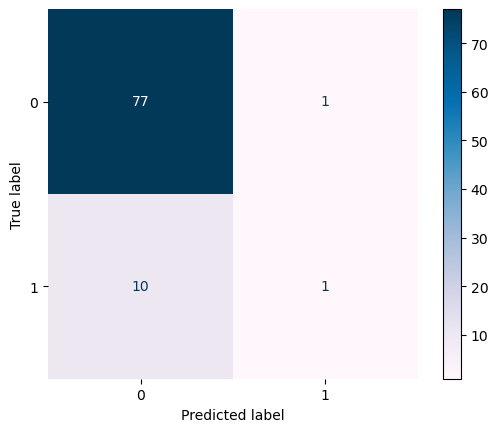

In [99]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(x, y7, 
                                                        test_size = 0.3, random_state = 7)
rfc7 = RandomForestClassifier(n_estimators = 6, random_state = 7) # 6 because of following codes to find the best number of trees
rfc7.fit(X_train7, y_train7)
y_pred_rfc7 = rfc7.predict(X_test7)
print("Train data accuracy:",accuracy_score(y_true = y_train7, y_pred = rfc7.predict(X_train7)))
print("Test data accuracy:",accuracy_score(y_true = y_test7, y_pred = y_pred_rfc7))
confusion_matrix_rfc7 = metrics.confusion_matrix(y_test7, y_pred_rfc7)
cm_display_rfc7 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc7)
cm_display_rfc7.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc7 = metrics.accuracy_score(y_test7, y_pred_rfc7)
print('accuracy', acc_rfc7)
pre_rfc7 = metrics.precision_score(y_test7, y_pred_rfc7, average = None)
print('precision', pre_rfc7)
senrec_rfc7 = metrics.recall_score(y_test7, y_pred_rfc7, average = None)
print('sensitivity recall', senrec_rfc7)
f1_rfc7 = metrics.f1_score(y_test7, y_pred_rfc7, average = None)
print('f1 score', f1_rfc7)
mcc_rfc7 = metrics.matthews_corrcoef(y_test7, y_pred_rfc7)
print('mcc score', mcc_rfc7)
ka_rfc7 = metrics.cohen_kappa_score(y_test7, y_pred_rfc7)
print('kappa', ka_rfc7)

In [71]:
# joblib.dump(rfc7, "my_random_forest_svp.joblib")

['my_random_forest_svp.joblib']

In [66]:
# rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
# rf.fit(X_train7, y_train7)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test7)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test7, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# best n_estimator 6

Text(0, 0.5, 'feature')

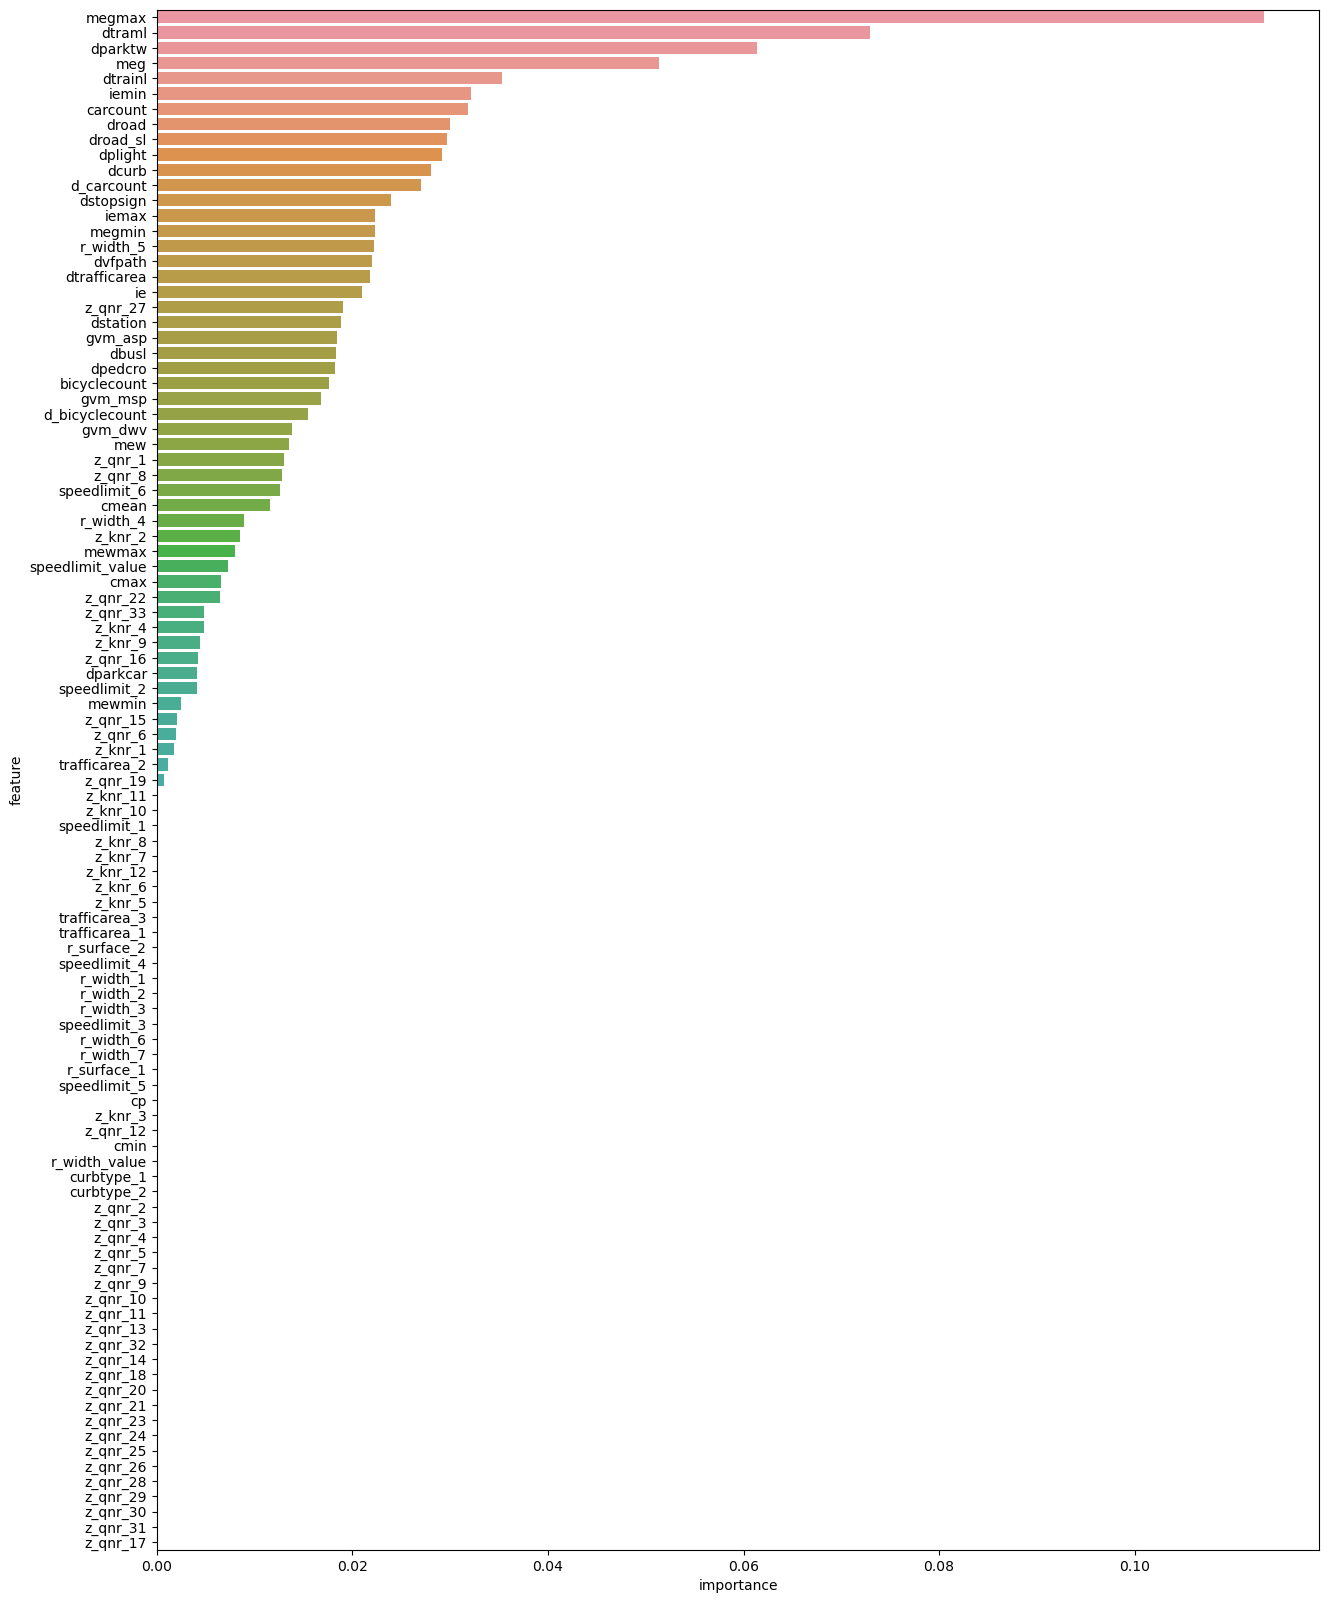

In [70]:
feature_name = list(x.columns.values.tolist())
importances = rfc7.feature_importances_
df_rfc7 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc7.sort_values(by = ['importances'], ascending = False, inplace = True)
plt.figure(figsize = [15,20])
sn.barplot(x = df_rfc7['importances'], y = df_rfc7['features'])
plt.xlabel('importance')
plt.ylabel('feature')
# plt.savefig('svp_rf_importance.png')

Train data accuracy: 0.970873786407767
Test data accuracy: 0.6629213483146067
accuracy 0.6629213483146067
precision [0.28571429 0.69512195]
sensitivity recall [0.07407407 0.91935484]
f1 score [0.11764706 0.79166667]
mcc score -0.011221709250356465
kappa -0.0083081570996979


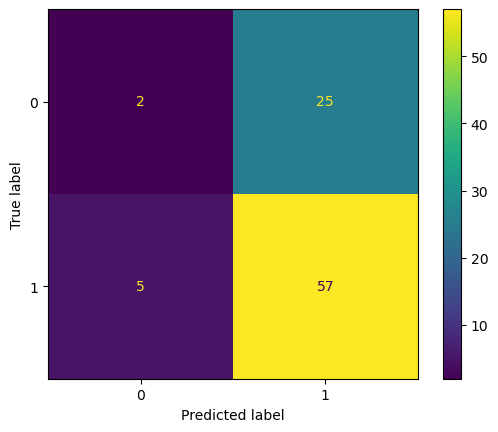

In [75]:
# LVP
X_train8, X_test8, y_train8, y_test8 = train_test_split(x, y8, 
                                                        test_size = 0.30, random_state = 8)
rfc8 = RandomForestClassifier(n_estimators = 11, max_depth = 8,random_state = 8)
rfc8.fit(X_train8, y_train8)
y_pred_rfc8 = rfc8.predict(X_test8)
print("Train data accuracy:",accuracy_score(y_true = y_train8, y_pred = rfc8.predict(X_train8)))
print("Test data accuracy:",accuracy_score(y_true = y_test8, y_pred = y_pred_rfc8))
confusion_matrix_rfc8 = metrics.confusion_matrix(y_test8, y_pred_rfc8)
cm_display_rfc8 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc8)
cm_display_rfc8.plot()
acc_rfc8 = metrics.accuracy_score(y_test8, y_pred_rfc8)
print('accuracy', acc_rfc8)
pre_rfc8 = metrics.precision_score(y_test8, y_pred_rfc8, average = None)
print('precision', pre_rfc8)
senrec_rfc8 = metrics.recall_score(y_test8, y_pred_rfc8, average = None)
print('sensitivity recall', senrec_rfc8)
f1_rfc8 = metrics.f1_score(y_test8, y_pred_rfc8, average = None)
print('f1 score', f1_rfc8)
mcc_rfc8 = metrics.matthews_corrcoef(y_test8, y_pred_rfc8)
print('mcc score', mcc_rfc8)
ka_rfc8 = metrics.cohen_kappa_score(y_test8, y_pred_rfc8)
print('kappa', ka_rfc8)

In [78]:
# joblib.dump(rfc8, "my_random_forest_lvp.joblib")

['my_random_forest_lvp.joblib']

In [76]:
# rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
# rf.fit(X_train8, y_train8)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test8)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test8, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# # best n_estimator 11

Text(0, 0.5, 'feature')

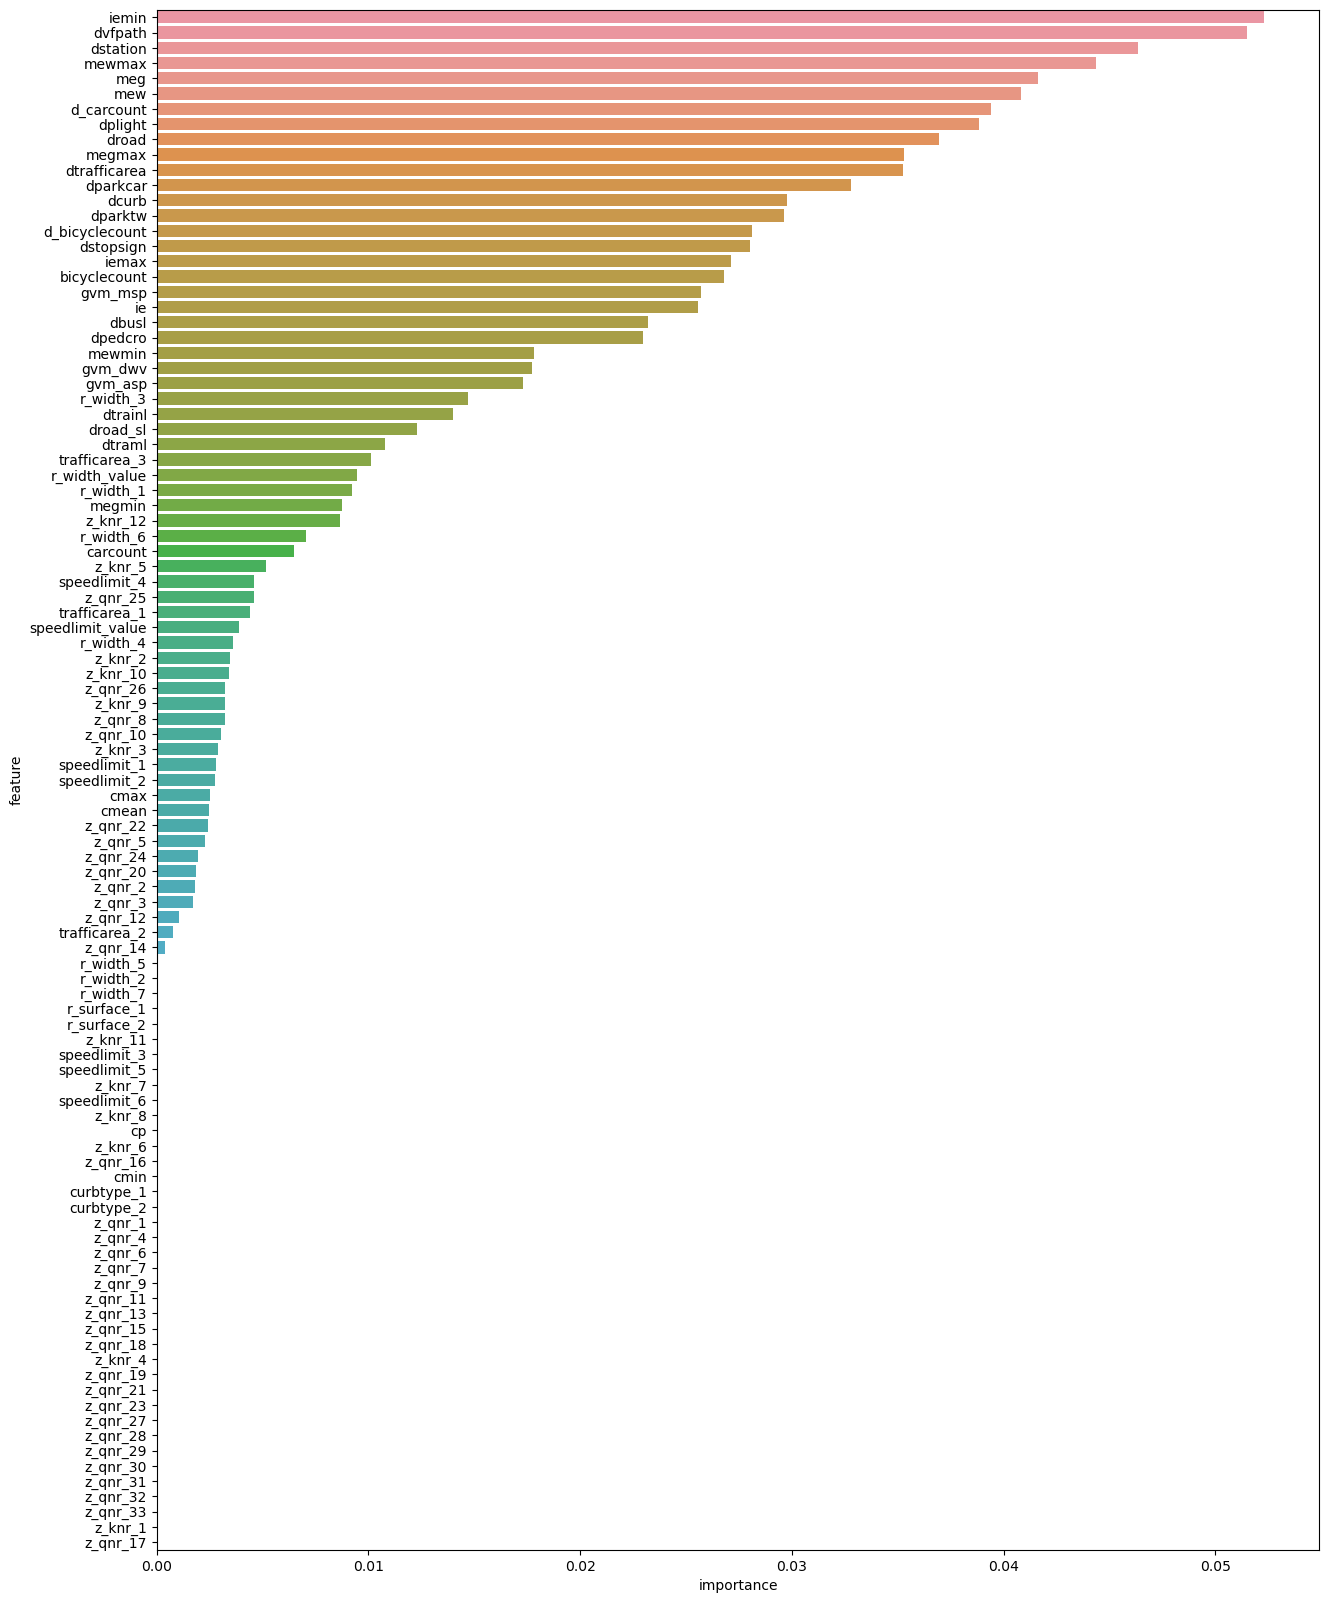

In [77]:
feature_name = list(x.columns.values.tolist())
importances = rfc8.feature_importances_
df_rfc8 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc8.sort_values(by = ['importances'], ascending = False, inplace = True)
plt.figure(figsize = [15,20])
sn.barplot(x = df_rfc8['importances'], y = df_rfc8['features'])
plt.xlabel('importance')
plt.ylabel('feature')
# plt.savefig('lvp_rf_importance.png')

Train data accuracy: 0.9223300970873787
Test data accuracy: 0.5955056179775281
accuracy 0.5955056179775281
precision [0.53846154 0.67567568]
sensitivity recall [0.7        0.51020408]
f1 score [0.60869565 0.58139535]
mcc score 0.21216153383940237
kappa 0.20456802383316786


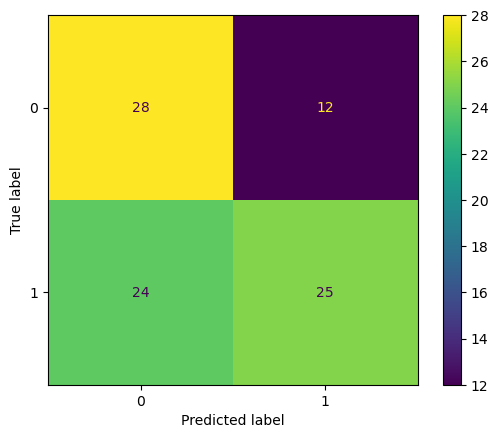

In [87]:
# pdp
X_train9, X_test9, y_train9, y_test9 = train_test_split(x, y9, 
                                                        test_size = 0.3, random_state = 9)
rfc9 = RandomForestClassifier(n_estimators = 6, max_depth = 9, random_state = 9) # n_estimators setting from following codes
rfc9.fit(X_train9, y_train9)
y_pred_rfc9 = rfc9.predict(X_test9)
print("Train data accuracy:",accuracy_score(y_true = y_train9, y_pred = rfc9.predict(X_train9)))
print("Test data accuracy:",accuracy_score(y_true = y_test9, y_pred = y_pred_rfc9))
confusion_matrix_rfc9 = metrics.confusion_matrix(y_test9, y_pred_rfc9)
cm_display_rfc9 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc9)
cm_display_rfc9.plot()
acc_rfc9 = metrics.accuracy_score(y_test9, y_pred_rfc9)
print('accuracy', acc_rfc9)
pre_rfc9 = metrics.precision_score(y_test9, y_pred_rfc9, average = None)
print('precision', pre_rfc9)
senrec_rfc9 = metrics.recall_score(y_test9, y_pred_rfc9, average = None)
print('sensitivity recall', senrec_rfc9)
f1_rfc9 = metrics.f1_score(y_test9, y_pred_rfc9, average = None)
print('f1 score', f1_rfc9)
mcc_rfc9 = metrics.matthews_corrcoef(y_test9, y_pred_rfc9)
print('mcc score', mcc_rfc9)
ka_rfc9 = metrics.cohen_kappa_score(y_test9, y_pred_rfc9)
print('kappa', ka_rfc9)

In [88]:
# joblib.dump(rfc9, "my_random_forest_pdp.joblib")

['my_random_forest_pdp.joblib']

In [72]:
# rf = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=-1)
# rf.fit(X_train9, y_train9)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test9)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test9, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# best n_estimator 6

Text(0, 0.5, 'feature')

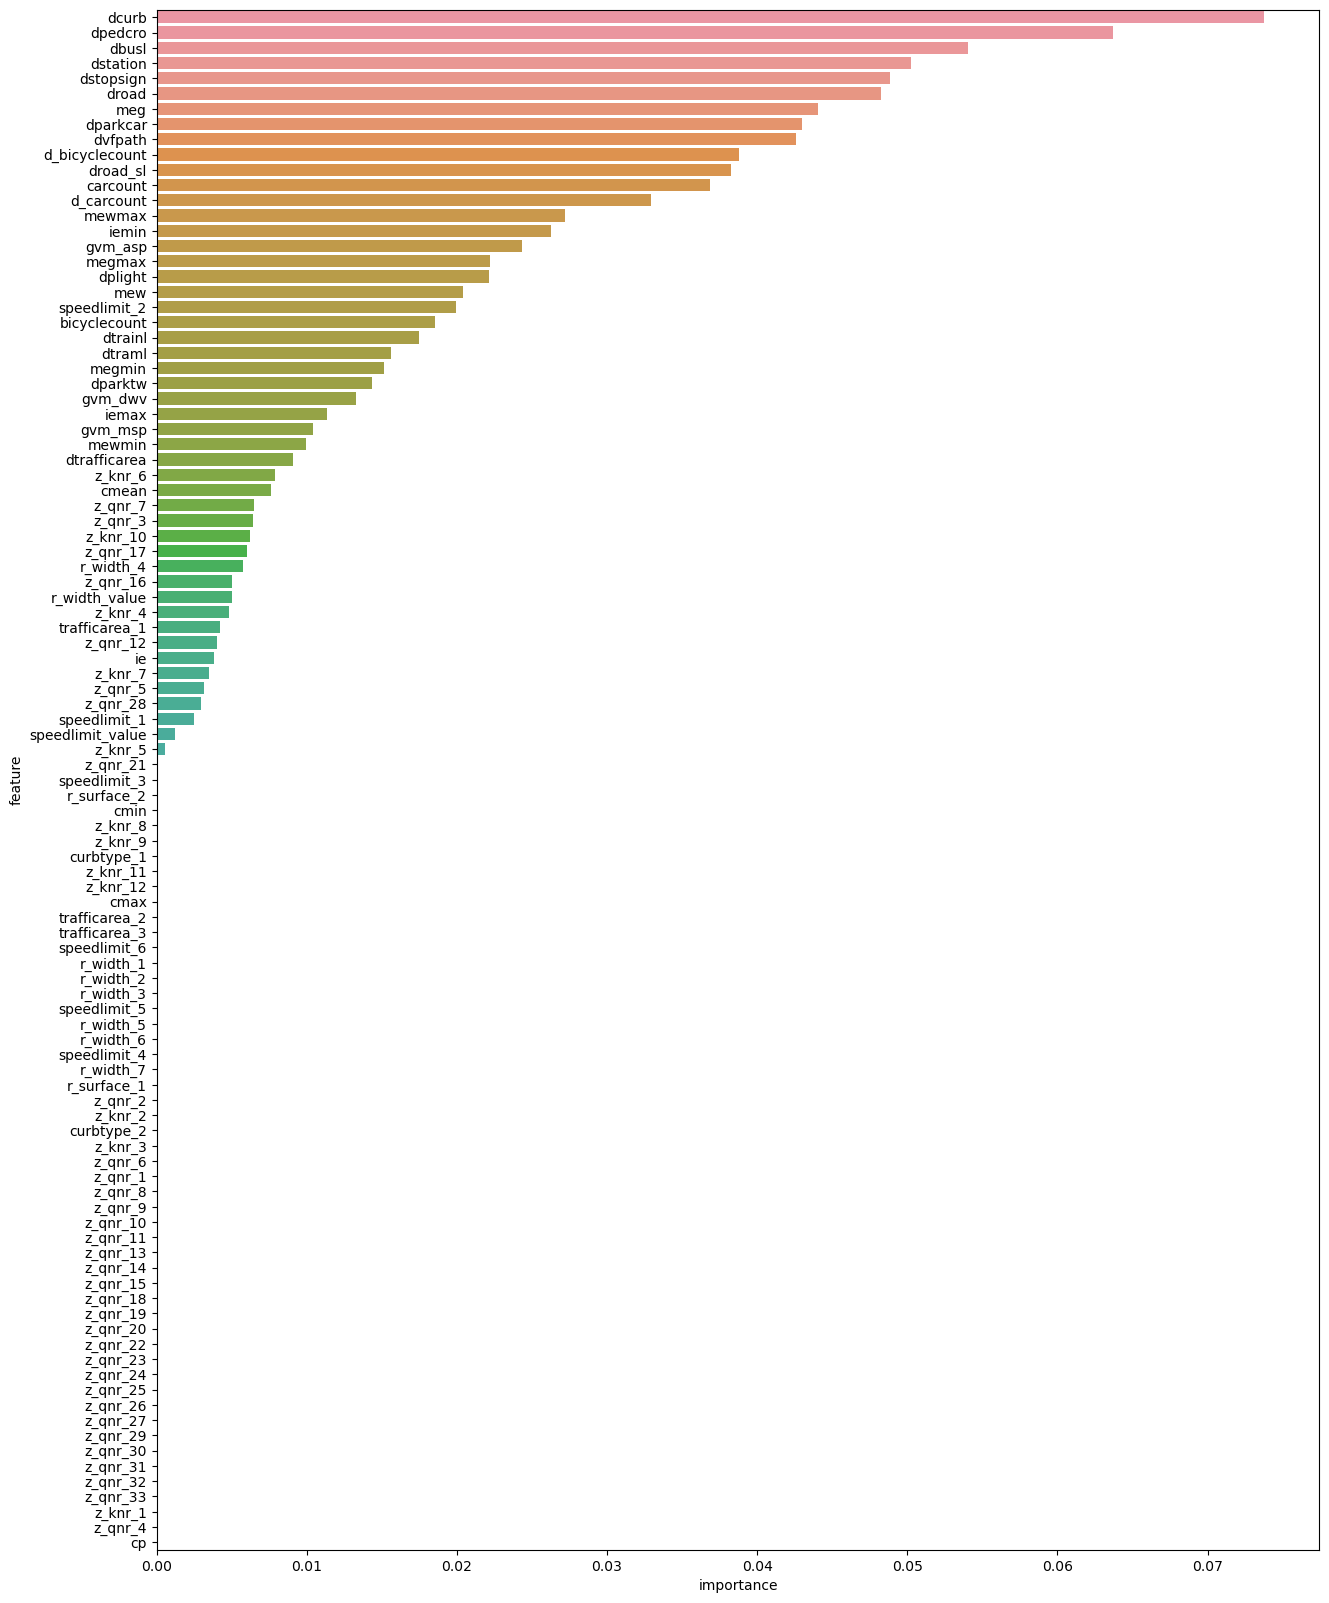

In [89]:
feature_name = list(x.columns.values.tolist())
importances = rfc9.feature_importances_
df_rfc9 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc9.sort_values(by = ['importances'], ascending = False, inplace = True)
plt.figure(figsize = [15,20])
sn.barplot(x = df_rfc9['importances'], y = df_rfc9['features'])
plt.xlabel('importance')
plt.ylabel('feature')
# plt.savefig('pd_rf_importance.png')